<a href="https://colab.research.google.com/github/EWECORP/DScience_41870/blob/main/ProyectoDS_ParteI_Eduardo_Ettlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

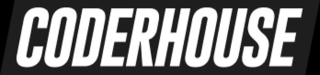

# **CURSO DE DATA SCIENCE**
# Comisión 41870

# **DESAFIO N° 3 - ESTRUCTURANDO UN PROYECTO DE DS (Parte 1)**

*AUTOR: Eduardo Ettlin

Continuarás trabajando con base en lo realizado en el Desafío entregable: **Visualización en Python**, en esta oportunidad deberás complementar con lo siguiente:


1.   Generar preguntas de interés o hipótesis de interés sobre el dataset elegido para el proyecto final.

2.   Crear visualizaciones (univariados, bivariados o trivariados) junto con resúmenes numéricos básicos acordes con los tipos de variables disponibles.
Interpretar los resultados obtenidos


In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
! pip install chart_studio
! pip install bqplot
! pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 6.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=0e289379aefce836be3161f077a04a7e4b3b02a7d0531cbb0daed450d0c5017c
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


# **DATASET ELEGIDO:**

Link de acceso al sitio de Kaggle: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
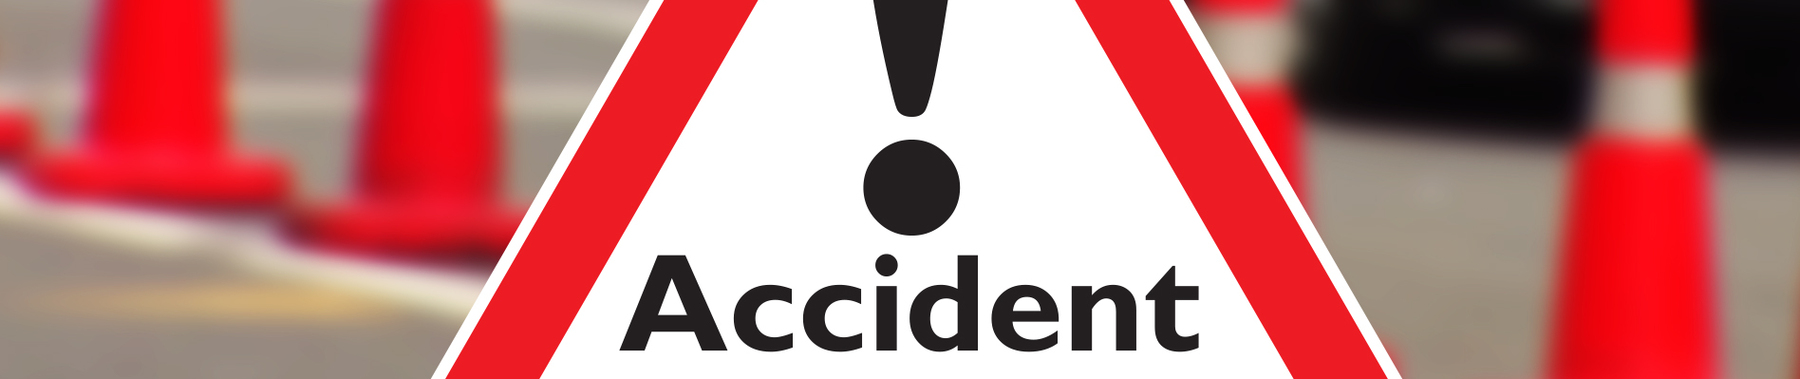


Contiene la información sobre accidentes en las principales ciudades de EE. UU. Posee una gran cantidad de variables que podrían relacionar causas y efectos de accidentes.



# **Paquetes Utilizados**

Se importan los paquetes necesarios

In [ ]:
import numpy as np # algebra lineal
import pandas as pd
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import statsmodels.formula.api as sm #regresion lineal


In [ ]:
#! pip install chart_studio

#import chart_studio.plotly     as py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.6 MB/s eta 0:00:00


In [ ]:
base_df =  pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DataScience/3er Desafio/US_Accidents_Dec21_updated.csv')


**# Se visualizan los primeros datos del Dataframe con sus nombre de columna**

In [ ]:
base_df.head(7)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,At OH-4/Exit 54 - Accident.,NaN,I-75 S,R,Dayton,Montgomery,OH,45404,US,US/Eastern,KFFO,2016-02-08 08:18:00,33.8,NaN,100.0,29.63,3.0,SW,2.3,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


### **Se visualiza la tupla de dimensiones de matriz que indica el número de filas y columnas de un DataFrame dado.**



In [ ]:
base_df.shape



(2845342, 47)

**Se visualiza La información que contiene el número de columnas, las etiquetas de las columnas, los tipos de datos de las columnas, el uso de la memoria, el índice de rango y el número de celdas en cada columna (valores no nulos).**

In [ ]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

Las variables disponibles seleccionadas son:

*   Elemento de lista
*   Elemento de lista

* Severity
* Temperature(F)
* Wind_Chill(F)


room_type: tipo de habitación;
city: ciudades;
bathrooms: cantidad de baños;
bedrooms: cantidad de habitaciones;
beds: cantidad de camas;

In [ ]:
base_df['Temp'] = base_df['Temperature(F)'] + base_df['Wind_Chill(F)'] # Crear una variable que contenga 

In [ ]:
base_df.head(7)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Temp
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,78.2
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,NaN
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,NaN
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,NaN
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,66.8
5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,64.8
6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,At OH-4/Exit 54 - Accident.,NaN,I-75 S,R,Dayton,Montgomery,OH,45404,US,US/Eastern,KFFO,2016-02-08 08:18:00,33.8,NaN,100.0,29.63,3.0,SW,2.3,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,NaN


# **Preguntas Básicas**

¿Que tan grave son los accidentes?

¿Están relacionados con el clima?

¿Qué ciudad en EE. UU. ha informado más no. de Casos de Accidentes en los últimos 5 años (2016-2020) ?

¿Cuáles son las 10 calles más propensas a los accidentes en EE. UU.?

Por día, en promedio, ¿cuántos accidentes de tráfico se produjeron en EE. UU.?

¿En qué horas del día ocurrieron la mayoría de los accidentes en EE. UU.?

¿Cómo son las condiciones climáticas básicas en la mayoría de los casos de accidentes en EE.UU.?

¿Cuáles son los 10 estados con más no. de los casos de accidentes de tráfico en EE.UU.?

## **1ra Pregunta**

¿Influyen las Condiciones Climáticas en la Cantidad de Accidentes?


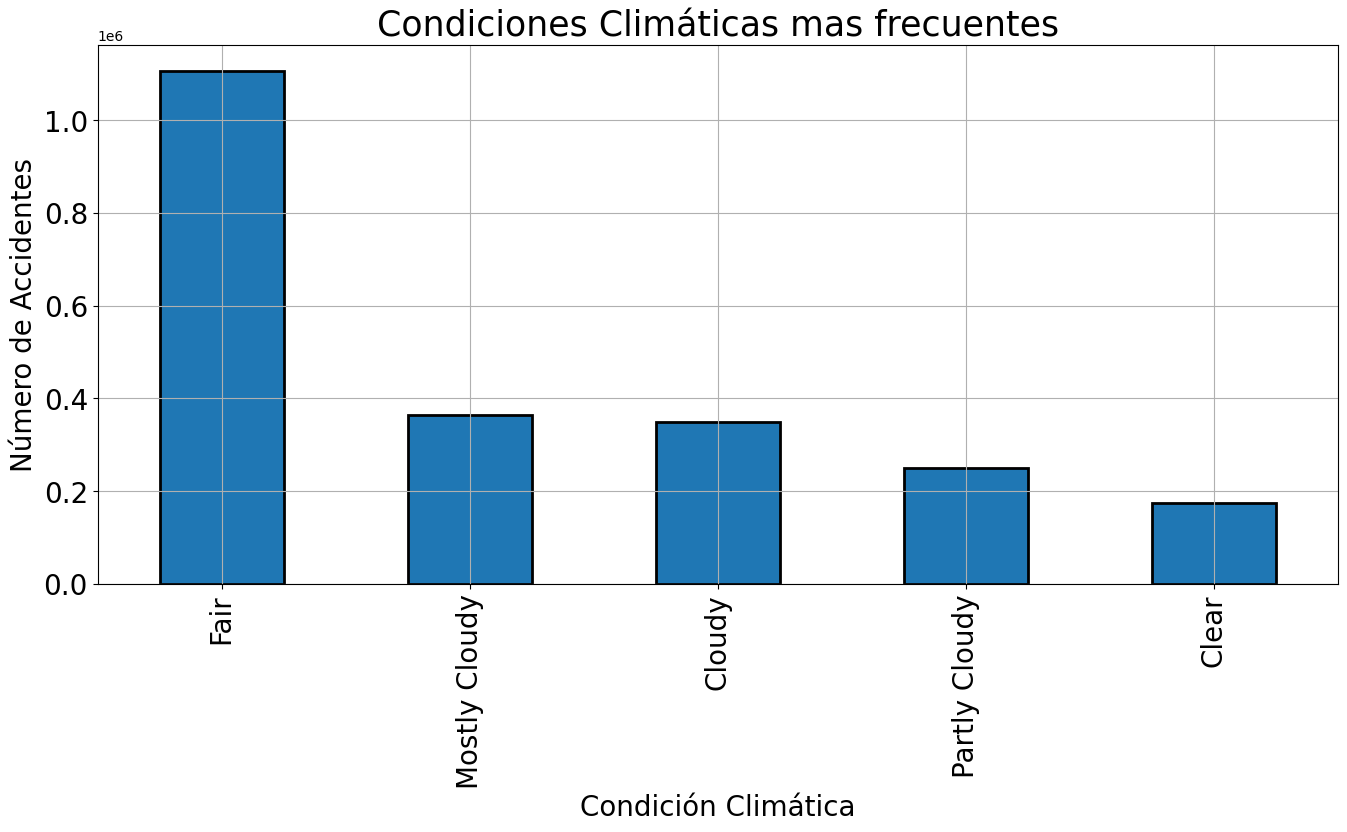

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
base_df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Condición Climática',fontsize=20)
plt.ylabel('Número de Accidentes',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Condiciones Climáticas mas frecuentes',fontsize=25)
plt.grid()
plt.ioff()

## Conslusiones Preliminars

Se puede advertir que la mayor cantidad de accidentes se dá con buen tiempo, por lo que no parece determinante el clima.

# **Algunos graficos descriptivos**


In [ ]:
#import calendar

In [ ]:
#base_df.Start_Time.dt.month_name.value_counts


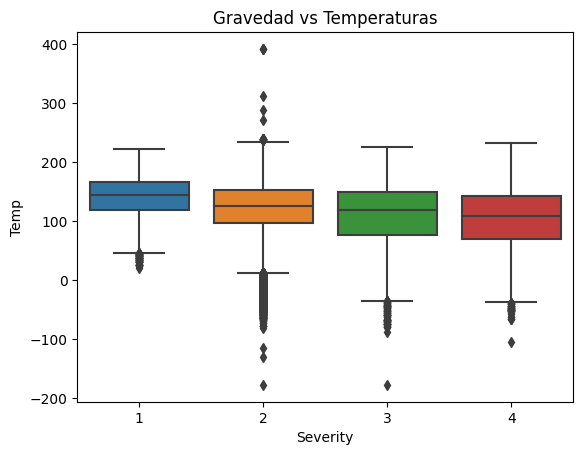

In [ ]:
sns.boxplot(x='Severity', y = 'Temp', data = base_df) 
plt.title("Gravedad vs Temperaturas");

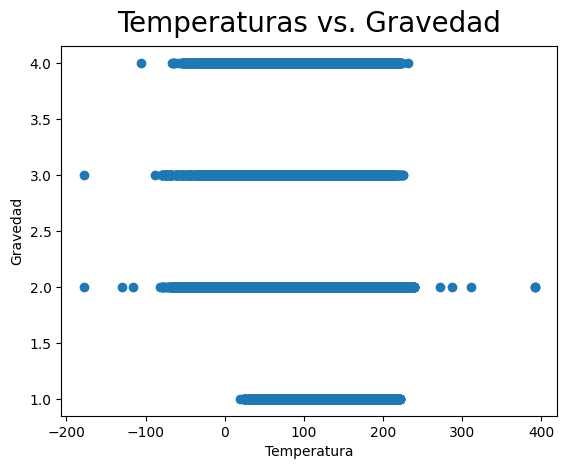

In [ ]:
plt.scatter(base_df['Temp'],base_df['Severity'])
plt.title("Temperaturas vs. Gravedad", fontsize=20, verticalalignment='bottom');
plt.xlabel("Temperatura");
plt.ylabel("Gravedad");

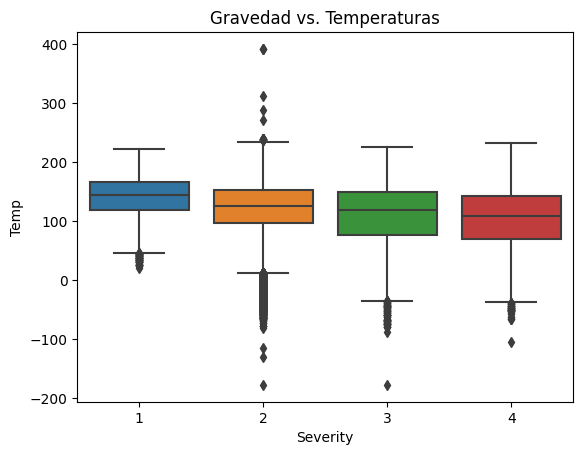

In [ ]:
sns.boxplot(x='Severity', y = 'Temp', data = base_df) 
#Data.boxplot(grid= False, column = ['pay'], by = ['gender'])
plt.title("Gravedad vs. Temperaturas");

In [ ]:
base_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Temp'],
      dtype='object')

In [ ]:
base_df.head(7)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Temp
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,78.2
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,NaN
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,NaN
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,NaN
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,66.8
5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,64.8
6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,At OH-4/Exit 54 - Accident.,NaN,I-75 S,R,Dayton,Montgomery,OH,45404,US,US/Eastern,KFFO,2016-02-08 08:18:00,33.8,NaN,100.0,29.63,3.0,SW,2.3,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,NaN


In [ ]:
model1 = 'Temp~Severity'
lm1   = sm.ols(formula = model1, data = base_df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                 2.118e+04
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:11:59   Log-Likelihood:            -1.2130e+07
No. Observations:             2375699   AIC:                         2.426e+07
Df Residuals:                 2375697   BIC:                         2.426e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    139.7957      0.134   1040.533      0.0

**Fórmula de mínimos cuadrados resultante:** (modificar)

y(Temp) = 139.7957 + -9.1825 * (Severity)

**R-squared (R-cuadrado)**

**el valor es = 0.009** conociendo que este valor tiene como minimo un valor igual a cero y un máximo de 1, es un valor bajo que nos indica que no es este modelo un ajuste apropiado.

**Omnibus**
* p<= 0.05 Rechaza Ho
* p> 0.05 Acepta Ho
* Prueba Omnibus: Varianza No constante Ho: Hipotesis nula, Varianza No es constante, No confiable.
* Prueba JB: Distribución No es Normal Ho: Hipotesis nula. No es confiable en algunos pronosticos.

**Prob(Omnibus)=0.000**

# **Modelo integrado teniendo en cuenta todas las variables**

In [ ]:
model5 = 'Temp~Severity + Side'
lm4    = sm.ols(formula = model5, data = base_df).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                 1.568e+04
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:23:23   Log-Likelihood:            -1.2125e+07
No. Observations:             2375699   AIC:                         2.425e+07
Df Residuals:                 2375696   BIC:                         2.425e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    145.2057      0.144   1005.079      0.0

Ecuación de la Recta: y(temp) = 145.2057 - 6.6915 * (Side[T,R]) - 8.228 * (Side[T,N]) - 9.1610 (Severity)


# **Conclusión:** 

Usamos las técnicas de regresión lineal para determinar cual era la relación de Temperatura del viento, Lado, Severidad y la cantidad de accidentes.

Modelamos el efecto de varias variables independientes (en este caso, severidad,temperatura, lado) para explicar la variación observada en una variable dependiente (en este caso, la cantidad de accidentes).

Observamos la estadística de $ R $ al cuadrado de nuestros modelos lineales para ayudarnos a medir qué porcentaje de la variación observada en la cantidad de accidentes se explica por las variables independientes.

En todos los modelos tratados no se encontro uno lo suficiente confiable ya que el valor de R-squared no supero el 0.5.

In [ ]:
#Identificar Fonts Instalados
matplotlib.font_manager.get_font_names()

['cmb10',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'cmtt10',
 'cmss10',
 'DejaVu Sans',
 'cmsy10',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'Liberation Sans',
 'Humor Sans',
 'STIXSizeFourSym',
 'STIXSizeFiveSym',
 'DejaVu Serif Display',
 'cmex10',
 'cmr10',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'Liberation Mono',
 'DejaVu Sans Display',
 'cmmi10']

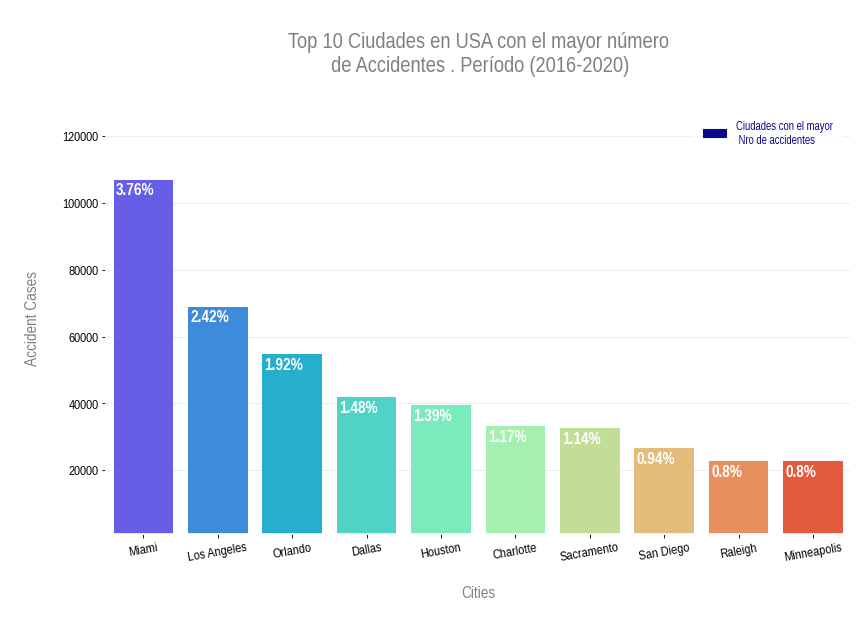

In [ ]:
# Defino área y formato del gráfico

fig, ax = plt.subplots(figsize = (12,7), dpi = 80)

cmap = mpl.colormaps['plasma']  
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_10_ciudades['Casos'], x=top_10_ciudades['Ciudad'], palette='rainbow')

total = sum(ciudades_df['Casos'])
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-4500, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15, weight='bold',
                color='white')

plt.title('\nTop 10 Ciudades en USA con el mayor número\n de Accidentes . Período (2016-2020)\n', size=20, color='grey')

plt.rcParams['font.family'] = "Liberation Sans Narrow"
plt.rcParams['font.serif'] = ["Liberation Sans Narrow"]

plt.ylim(1000, 130000)
plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)

ax.set_xlabel('\nCities\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'left']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
MA = mpatches.Patch(color=clrs[0], label='Ciudades con el mayor\n Nro de accidentes')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');
plt.show()

## Conclusiones Preliminares:

1. Miami es la ciudad con mayor (3,76%) no. de accidentes de tráfico en EE. UU. (2016-2020).

2. Los Ángeles es la ciudad con el 2° lugar más alto (2.42%) no. de accidentes de tráfico en EE. UU. (2016-2020).

3. Alrededor del 15% de los registros de accidentes de los últimos 5 años son solo de estas 10 ciudades de un total de 10,657 ciudades en EE. UU. (según el conjunto de datos).

## **2do Gráfico Seaborn**

*Pregunta:*

¿Cuál es la cantidad promedio de accidentes por ESTADO?

¿cuántos accidentes de tráfico se produjeron POR DIA en EE. UU.?

Se puede visualizar el ranking de los primeros 10 estados con mayor cantidad de accidentes.

In [ ]:
# crear Diccionario con el nombre de los estados
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}

# crear un dataframe de los Estados y cantidad de accidentes
state_df = pd.DataFrame(df1['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})


# Function para devolver el nombre del Estado desde el Código 
def convert(x): return us_states[x]

state_df['State'] = state_df['State'].apply(convert)

#Genero dataframe con los Primeros 10
top_ten_states_name = list(state_df['State'].head(10))

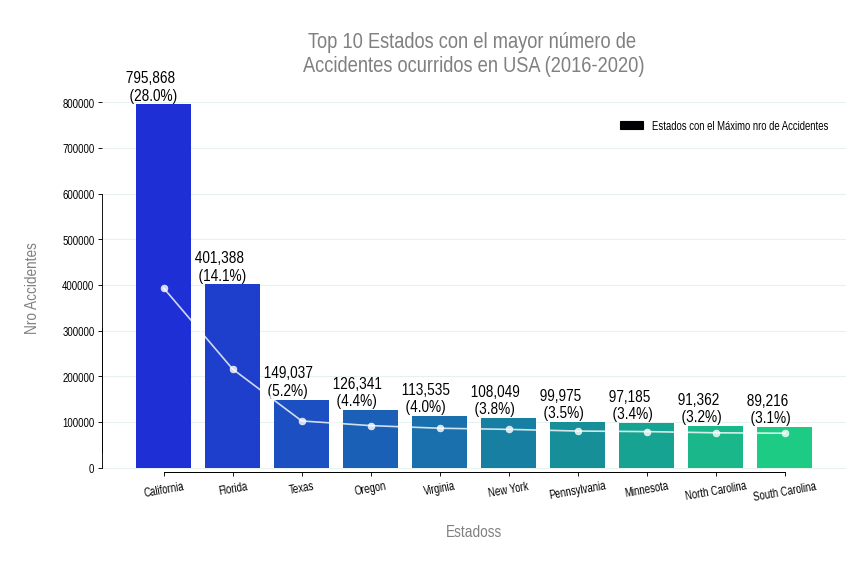

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = mpl.colormaps['inferno']   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=state_df['Cases'].head(10), x=state_df['State'].head(10), palette='winter')
ax1 = ax.twinx()
sns.lineplot(data = state_df[:10], marker='o', x='State', y='Cases', color = 'white', alpha = .8)


total = df1.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.2, i.get_height()+10000, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 1)), fontsize=15,
                color='black')


ax.set(ylim =(-10000, 800000))
ax1.set(ylim =(-100000, 1700000))

plt.title('\nTop 10 Estados con el mayor número de \nAccidentes ocurridos en USA (2016-2020)\n', size=20, color='grey')
ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nEstadoss\n', fontsize=15, color='grey')
ax.set_ylabel('\nNro Accidentes\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 600000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 600000)
ax.tick_params(axis='y', which='major', labelsize=10.6)
ax.tick_params(axis='x', which='major', labelsize=10.6, rotation=10)

MA = mpatches.Patch(color=clrs[0], label='Estados con el Máximo nro de Accidentes')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');


1. En EE. UU., California es el estado con el número más alto. de accidentes de tránsito en los últimos 5 años.

2. Cerca del 30 % del total de registros de accidentes de los últimos 5 años en EE. UU. es solo de California.

3. En los últimos 5 años, un promedio de 436 accidentes (diarios) ocurridos en California implica aproximadamente 18 accidentes por hora.

4. Florida es el segundo estado más alto (14% de casos) para el no. Accidentes de tráfico en EE.

## Conslusiones Preliminars

1. En el 89% de los Casos de siniestros viales, la afectación al tránsito fue Moderada (Gravedad-2).

2. En el 4,61% de los Casos de siniestros viales, la afectación al tránsito fue Altamente Severa (Gravedad-4).